# Prerequisite

In [5]:
# !pip3 install -U scikit-image
!pip3 list | grep scikit

DEPRECATION: The default format will switch to columns in the future. You can use --format=(legacy|columns) (or define a format=(legacy|columns) in your pip.conf under the [list] section) to disable this warning.
intel-scikit-learn (0.19.2)
scikit-image (0.15.0)
scikit-learn (0.19.2)


# scikit-image : PSNR, SSIM, Transpose(CWH, WHC), Clip
* https://scikit-image.org/docs/0.15.x/auto_examples/filters/plot_denoise_wavelet.html#sphx-glr-auto-examples-filters-plot-denoise-wavelet-py

In [70]:
import matplotlib.pyplot as plt

from skimage.restoration import (denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float
from skimage.util import random_noise
from skimage.measure import compare_psnr, compare_ssim

original = img_as_float(data.chelsea())#[100:250, 50:300])
print(original.shape)
# print(original)

(300, 451, 3)


In [76]:
sigma = 0.12
noisy = random_noise(original, var=sigma**2)

# Estimate the average noise standard deviation across color channels.
sigma_est = estimate_sigma(noisy, multichannel=True, average_sigmas=True)
# Due to clipping in random_noise, the estimate will be a bit smaller than the
# specified sigma.
print("Estimated Gaussian noise standard deviation = {}".format(sigma_est))

im_bayes = denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                           method='BayesShrink', mode='soft')
im_visushrink = denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                                method='VisuShrink', mode='soft',
                                sigma=sigma_est)

# VisuShrink is designed to eliminate noise with high probability, but this
# results in a visually over-smooth appearance.  Repeat, specifying a reduction
# in the threshold by factors of 2 and 4.
im_visushrink2 = denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                                 method='VisuShrink', mode='soft',
                                 sigma=sigma_est/2)
im_visushrink4 = denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                                 method='VisuShrink', mode='soft',
                                 sigma=sigma_est/4)

Estimated Gaussian noise standard deviation = 0.1180419180100386


In [77]:
# Compute PSNR as an indication of image quality
psnr_noisy = compare_psnr(original, noisy)
ssim_noisy = compare_ssim(original, noisy, multichannel=True)
psnr_bayes = compare_psnr(original, im_bayes)
ssim_bayes = compare_ssim(original, im_bayes, multichannel=True)
psnr_visushrink = compare_psnr(original, im_visushrink)
psnr_visushrink2 = compare_psnr(original, im_visushrink2)
psnr_visushrink4 = compare_psnr(original, im_visushrink4)

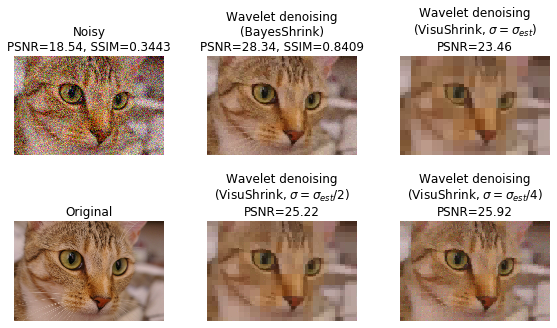

In [78]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 5),
                       sharex=True, sharey=True)

plt.gray()

ax[0, 0].imshow(noisy)
ax[0, 0].axis('off')
ax[0, 0].set_title('Noisy\nPSNR={:0.4g}, SSIM={:0.4g}'.format(psnr_noisy, ssim_noisy))
ax[0, 1].imshow(im_bayes)
ax[0, 1].axis('off')
ax[0, 1].set_title(
    'Wavelet denoising\n(BayesShrink)\nPSNR={:0.4g}, SSIM={:0.4g}'.format(psnr_bayes, ssim_bayes))
ax[0, 2].imshow(im_visushrink)
ax[0, 2].axis('off')
ax[0, 2].set_title(
    ('Wavelet denoising\n(VisuShrink, $\sigma=\sigma_{est}$)\n'
     'PSNR=%0.4g' % psnr_visushrink))
ax[1, 0].imshow(original)
ax[1, 0].axis('off')
ax[1, 0].set_title('Original')
ax[1, 1].imshow(im_visushrink2)
ax[1, 1].axis('off')
ax[1, 1].set_title(
    ('Wavelet denoising\n(VisuShrink, $\sigma=\sigma_{est}/2$)\n'
     'PSNR=%0.4g' % psnr_visushrink2))
ax[1, 2].imshow(im_visushrink4)
ax[1, 2].axis('off')
ax[1, 2].set_title(
    ('Wavelet denoising\n(VisuShrink, $\sigma=\sigma_{est}/4$)\n'
     'PSNR=%0.4g' % psnr_visushrink4))
fig.tight_layout()

plt.show()

# Random image

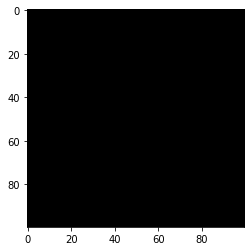

In [81]:
import numpy as np
tmp = np.zeros((100,100,3))  # 0~1 float gaussian distribution
plt.imshow(tmp)

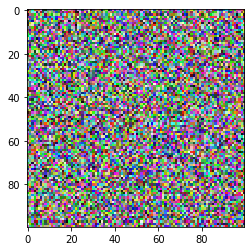

In [82]:
import numpy as np
tmp = np.random.rand(100,100,3)
plt.imshow(tmp)

# min & max of image, clip, transpose

In [83]:
def get_min_max_of_arr(arr_in):
    import numpy as np
    return np.min(arr_in), np.max(arr_in)
# UNIT TEST
min_, max_ = get_min_max_of_arr(tmp)
print("shape : {}, min : {}, max : {}".format(tmp.shape, min_, max_))

shape : (100, 100, 3), min : 1.0008557136398366e-06, max : 0.9999645764733697


In [88]:
print("original shape : {}".format(original.shape))
transposed_data = np.transpose(original, (2, 0, 1))
print("transposed shape : {}".format(transposed_data.shape))

original shape : (300, 451, 3)
transposed shape : (3, 300, 451)


(300, 451, 3)


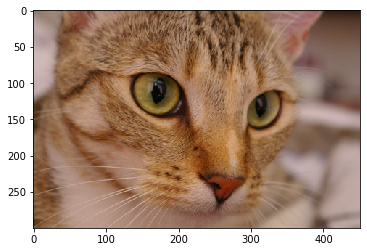

In [89]:
transposed_data = np.transpose(transposed_data, (1, 2, 0))
print(transposed_data.shape)
plt.imshow(transposed_data)

In [90]:
# import torch

In [98]:
# numpy.clip(a, a_min, a_max, out=None, **kwargs)[source]
import numpy as np
cliped = np.clip(original, 0.7, 0.9)
min_, max_ = get_min_max_of_arr(cliped)
print("shape : {}, min : {}, max : {}".format(cliped.shape, min_, max_))
print(cliped)

shape : (300, 451, 3), min : 0.7, max : 0.9
[[[0.7 0.7 0.7]
  [0.7 0.7 0.7]
  [0.7 0.7 0.7]
  ...
  [0.7 0.7 0.7]
  [0.7 0.7 0.7]
  [0.7 0.7 0.7]]

 [[0.7 0.7 0.7]
  [0.7 0.7 0.7]
  [0.7 0.7 0.7]
  ...
  [0.7 0.7 0.7]
  [0.7 0.7 0.7]
  [0.7 0.7 0.7]]

 [[0.7 0.7 0.7]
  [0.7 0.7 0.7]
  [0.7 0.7 0.7]
  ...
  [0.7 0.7 0.7]
  [0.7 0.7 0.7]
  [0.7 0.7 0.7]]

 ...

 [[0.7 0.7 0.7]
  [0.7 0.7 0.7]
  [0.7 0.7 0.7]
  ...
  [0.7 0.7 0.7]
  [0.7 0.7 0.7]
  [0.7 0.7 0.7]]

 [[0.7 0.7 0.7]
  [0.7 0.7 0.7]
  [0.7 0.7 0.7]
  ...
  [0.7 0.7 0.7]
  [0.7 0.7 0.7]
  [0.7 0.7 0.7]]

 [[0.7 0.7 0.7]
  [0.7 0.7 0.7]
  [0.7 0.7 0.7]
  ...
  [0.7 0.7 0.7]
  [0.7 0.7 0.7]
  [0.7 0.7 0.7]]]


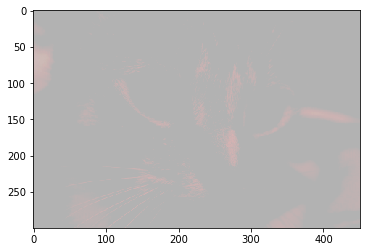

In [99]:
plt.imshow(cliped)